In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

training_set = df.iloc[:800, [1]].values
test_set = df.iloc[800:, [1]].values

# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = [] #預測點的前 60 天的資料
y_train = [] #預測點

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#轉成numpy array的格式
#(740, 60, 1)

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)
model.save("LSTM_model.h5")

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, [1]]
dataset_test = df.iloc[800:, [1]]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,520):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(y_train.shape)
print(X_test.shape)
# (459, 60, 1)

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price.shape)


Using TensorFlow backend.
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

Number of rows and columns: (1259, 7)

Epoch 1/10
740/740 [==============================] - 3s 4ms/step - loss: 0.0679
Epoch 2/10
740/740 [==============================] - 2s 2ms/step - loss: 0.0175
Epoch 3/10
740/740 [==============================] - 2s 2ms/step - loss: 0.0134
Epoch 4/10
740/740 [==============================] - 2s 2ms/step - loss: 0.0115
Epoch 5/10
740/740 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 6/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 7/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0119
Epoch 8/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0101
Epoch 9/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0118
Epoch 10/10
740/740 [==============================] - 2s 3ms/step - loss: 0.0096
(740,)
(460, 60, 1)
(460, 1)


NameError: name 'ax' is not defined

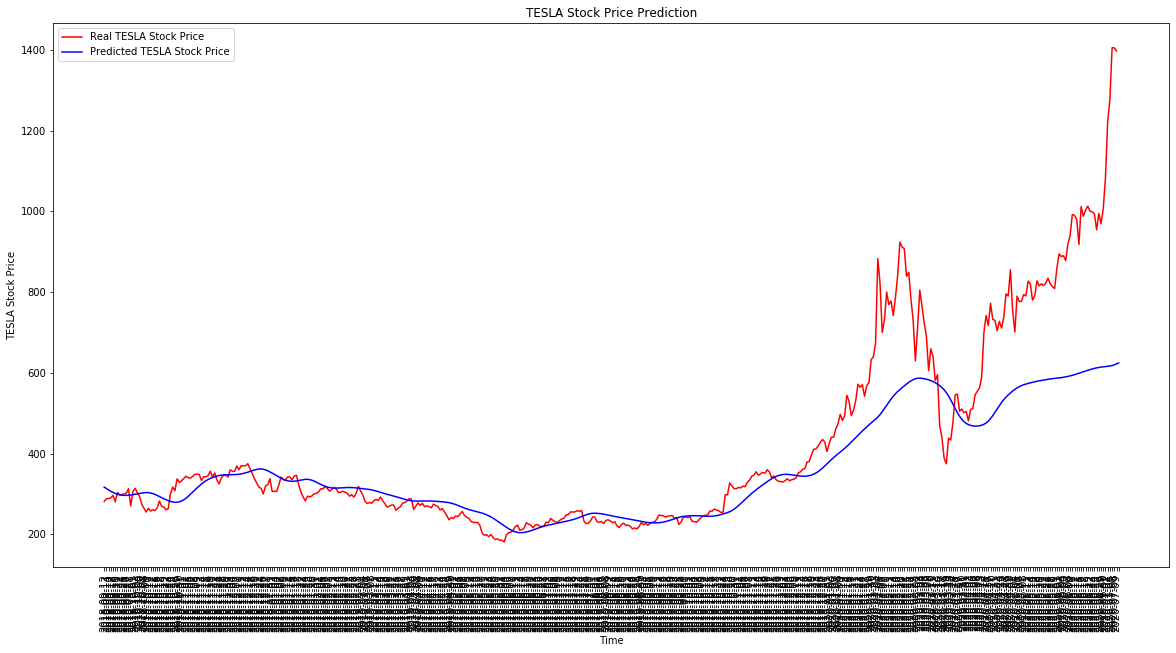

In [2]:
# Visualising the results
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,460,1),rotation = 90)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()
plt.savefig("Figure1.png",
            bbox_inches='tight',               
            pad_inches=0.0)

In [ ]:
np.savetxt('result_0908.csv', predicted_stock_price, delimiter = ',')